Waste Management Using CNN

In [11]:
#requrirements.txt
#numpy
#pandas
#matplotlib
#opencv-python

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [13]:
train_path="/content/waste-classification-data/DATASET/TRAIN"
test_path="/content/waste-classification-data/DATASET/TEST"

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [15]:
#visulaization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2466.20it/s]


In [16]:
data.shape

(22564, 2)

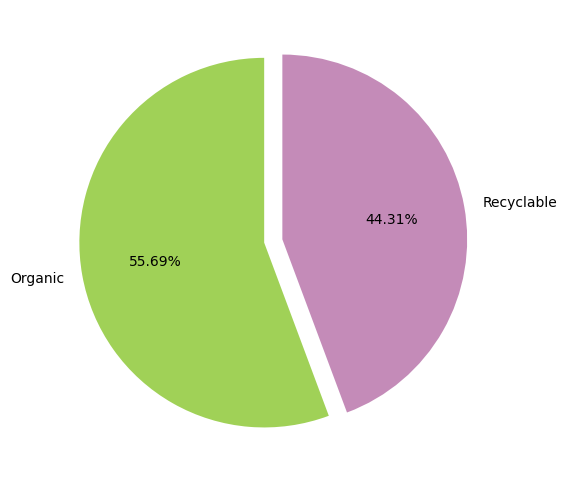

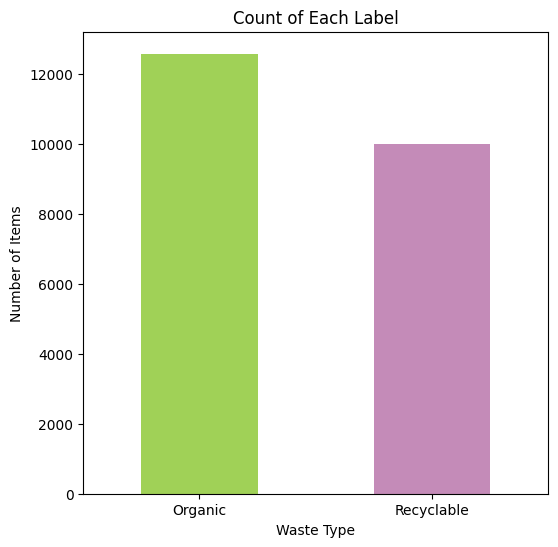

In [17]:
colors = ["#a0d157", "#c48bb8"]
plt.figure(figsize=(10, 6))
plt.pie(data.label.value_counts(), labels=["Organic", "Recyclable"], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05, 0.05])  # explode is optional
plt.show()

# Adding a bar plot to visualize the count of each label
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 6))
label_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Label')
plt.xlabel('Waste Type')
plt.ylabel('Number of Items')
plt.xticks(ticks=[0, 1], labels=["Organic", "Recyclable"], rotation=0)
plt.show()

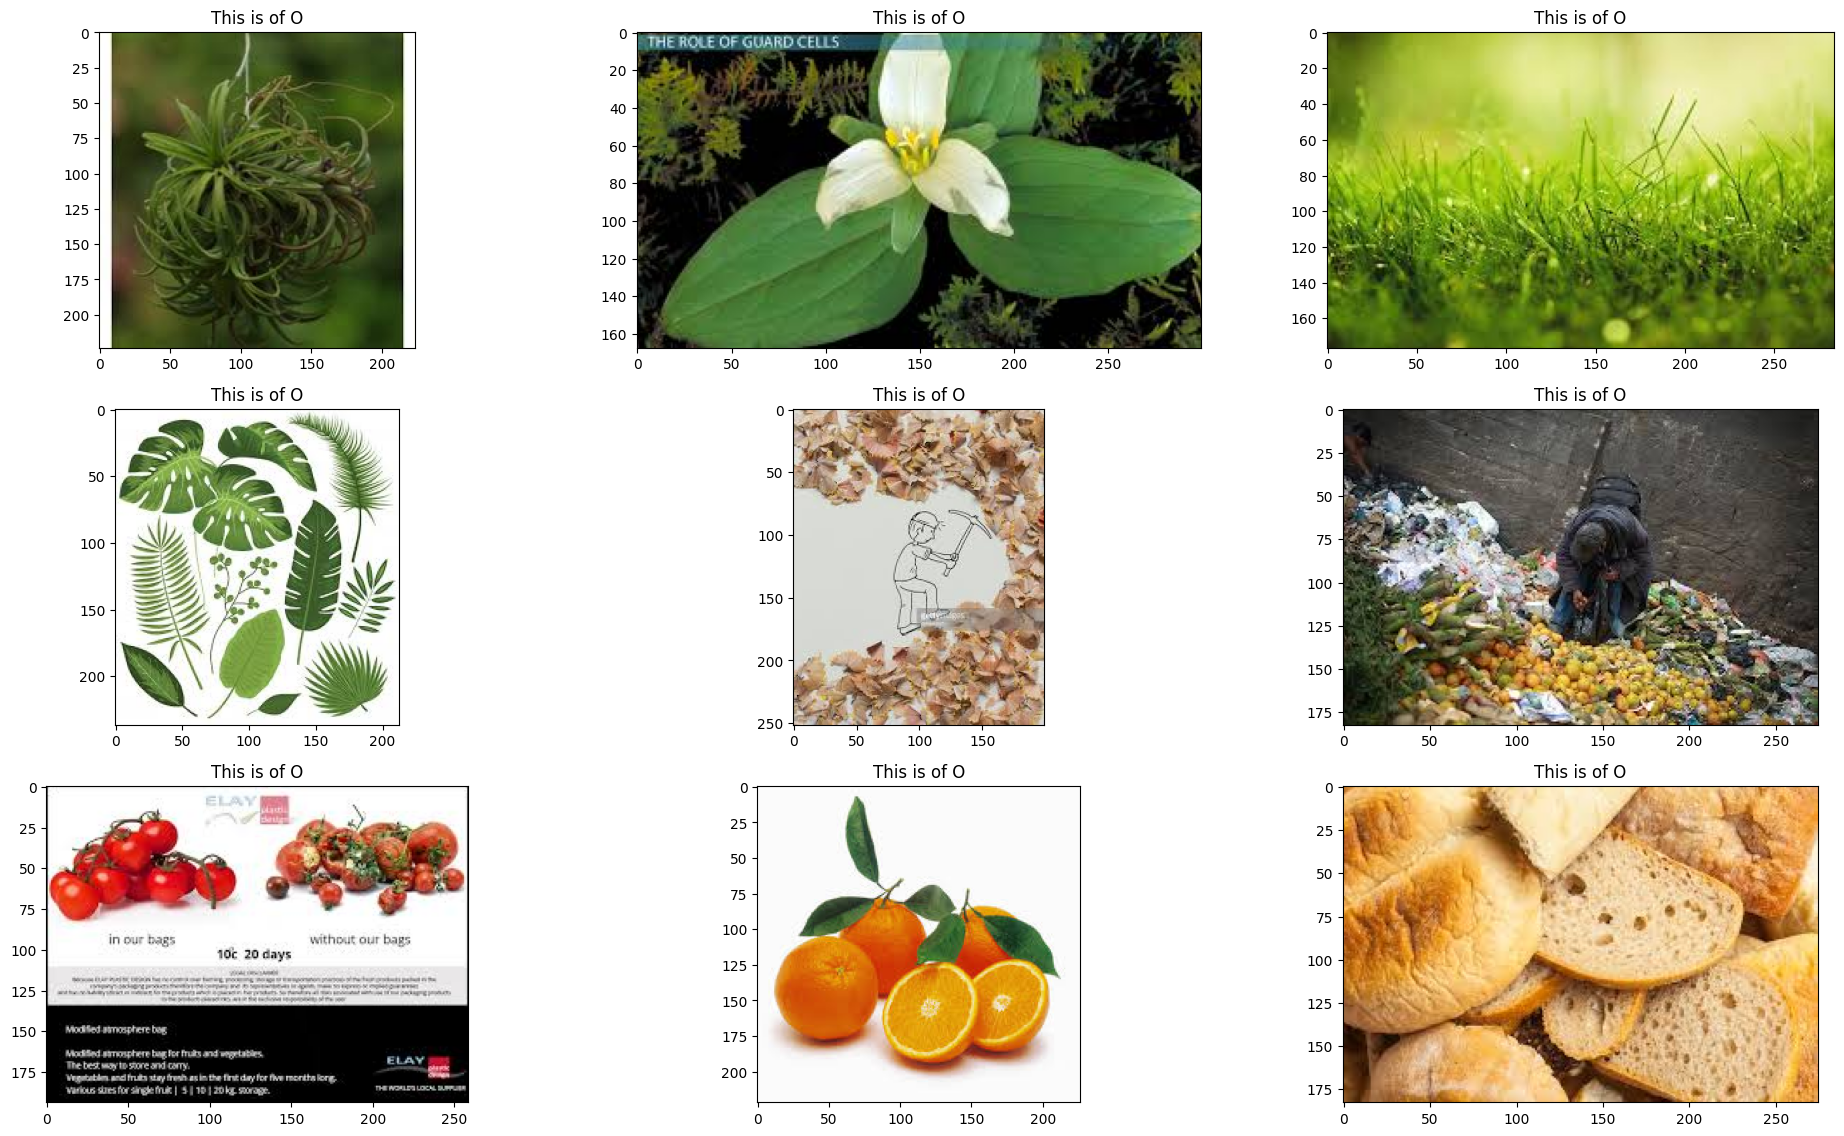

In [18]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [19]:
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size = 256

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_datagen= train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=batch_size,color_mode="rgb",class_mode='categorical')
test_datagen= test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=batch_size,color_mode="rgb",class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [23]:
hist=model.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 97s 820ms/step - accuracy: 0.6996 - loss: 0.7198 - val_accuracy: 0.8786 - val_loss: 0.3492
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 550ms/step - accuracy: 0.8239 - loss: 0.4292 - val_accuracy: 0.8651 - val_loss: 0.3452
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 551ms/step - accuracy: 0.8471 - loss: 0.3802 - val_accuracy: 0.8953 - val_loss: 0.2912
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 587ms/step - accuracy: 0.8634 - loss: 0.3458 - val_accuracy: 0.8866 - val_loss: 0.2975
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 553ms/step - accuracy: 0.8742 - loss: 0.3184 - val_accuracy: 0.8918 - val_loss: 0.2878
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 557ms/step - accuracy: 0.8818 - loss: 0.2975 - val_accuracy: 0.8834 - val_loss: 0.3078
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 558ms/step - accuracy: 0.9031 - loss: 0.2481 - val_accuracy: 0.8798 - val_loss: 0.3283
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 556ms/step - accuracy: 0.9168 - loss: 0.2113 - val_accu

In [31]:
model.save('CNNModel.h5')
print('Model Saved!')

Model Saved!
